In [3]:
import random
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

from copy import copy

# Notebook playground to find appropriate directed graph classes

## [Intrinsically Directed](https://networkx.org/documentation/stable/reference/generators.html#module-networkx.generators.directed)
### 1. Growwing Network
a) Basic (GN)
- The GN graph is built by adding nodes one at a time with a link to one previously added node. The target node for the link is chosen with probability based on degree. The default attachment kernel is a linear function of the degree of a node. 
- `kernel` controlls the distribution (`1/x` seems to work quite well) 

b) Redirected (GNR)
- Redirects the newly added edge with probability `p` (redirection seems not to work...)  

c) Copy (GNC)
- Adds connection to all successors
- COULD WORK (but with added kernel)

### [Scale Free Graph](https://networkx.org/documentation/stable/reference/generated/networkx.generators.directed.scale_free_graph.html#networkx.generators.directed.scale_free_graph)

## From Undirected
### 1. erdos_renyi_graph
- `n` - number of nodes (Constant 100)
- `p` - probability for edge creation (variable)
- Differs only by the node degree, so it will be trivial to LDP

### 2. barabasi_albert_graph
- Need to reimplement for directed version
  - e.g. based on indegree

In [4]:
def load_networkx_graph(path: str) -> nx.DiGraph:
    np_network = np.load(path)
    return nx.DiGraph(np_network)

def draw(g: nx.DiGraph, with_labels=False):
    nx.draw(g, pos=nx.circular_layout(g), node_size=5, width=0.1, with_labels=with_labels)
    plt.show()

def shuffle_digraph(g: nx.DiGraph, seed: int = 42) -> nx.DiGraph:

    # Collect edges
    new_edges = []
    for u, v in g.edges():
        new_edges.append((u, v))

    # Shuffle edges
    random.Random(seed).shuffle(new_edges)

    # Create a new graph and return it
    return nx.DiGraph(new_edges)

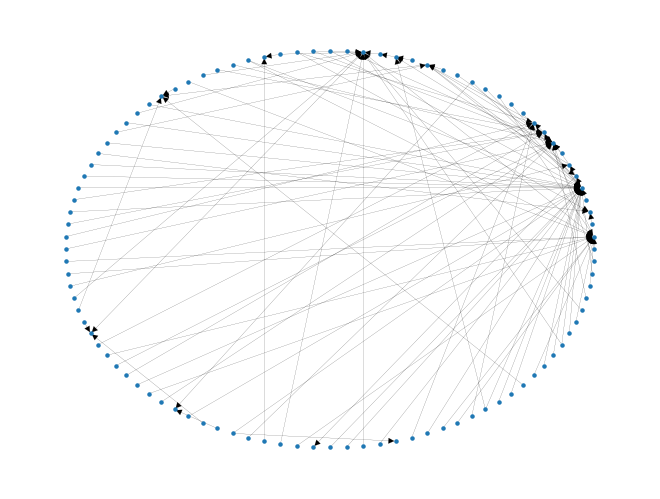

Number of edges: 106


In [5]:
seed = random.randint(0, 1000)
config = {
    "n": 100,
    "alpha": 0.9,
    "beta": 0.05,
    "gamma": 0.05,
    "delta_in": 0.,
    "delta_out": 0.0,
}
n_initial = 10

# Create initial clique graph
# g_init = nx.MultiDiGraph(nx.complete_graph(9))
g_init = nx.MultiDiGraph([(i, (i+1)%n_initial) for i in range(n_initial)])

# Create a scale-free directed graph
G = nx.scale_free_graph(**config, initial_graph=g_init, seed=seed)

# Convert multigraph to a simple graph
G = nx.DiGraph(G)

# Remove self-loops
G.remove_edges_from(nx.selfloop_edges(G))

# Reorder nodes
G = shuffle_digraph(G, seed=seed)

# Print the graph
draw(G)

# Count the number of edges
print(f"Number of edges: {G.number_of_edges()}")

In [6]:
G.edges()

OutEdgeView([(94, 8), (8, 9), (75, 23), (82, 2), (2, 3), (3, 4), (3, 85), (4, 5), (4, 15), (59, 15), (9, 0), (0, 1), (77, 2), (58, 2), (68, 8), (96, 2), (18, 2), (18, 21), (28, 15), (33, 1), (1, 2), (1, 24), (1, 3), (1, 15), (99, 5), (5, 6), (6, 7), (7, 8), (7, 37), (53, 15), (14, 2), (32, 15), (32, 7), (19, 23), (19, 0), (79, 81), (79, 7), (46, 8), (46, 2), (51, 15), (90, 9), (43, 7), (55, 8), (62, 24), (42, 2), (40, 7), (34, 2), (92, 1), (69, 2), (45, 23), (88, 2), (10, 2), (66, 2), (49, 9), (56, 2), (97, 9), (38, 0), (91, 15), (41, 8), (78, 8), (65, 4), (36, 7), (64, 24), (63, 37), (87, 0), (11, 8), (50, 15), (95, 9), (54, 2), (73, 8), (93, 15), (30, 2), (48, 37), (57, 21), (35, 2), (35, 84), (26, 15), (83, 81), (25, 7), (76, 8), (89, 2), (22, 2), (67, 7), (44, 2), (39, 0), (98, 2), (72, 8), (52, 8), (31, 0), (16, 5), (16, 2), (27, 2), (61, 2), (74, 24), (71, 8), (86, 2), (20, 2), (29, 7), (29, 2), (12, 2), (47, 8), (60, 7), (17, 15), (13, 8), (80, 2), (70, 15)])

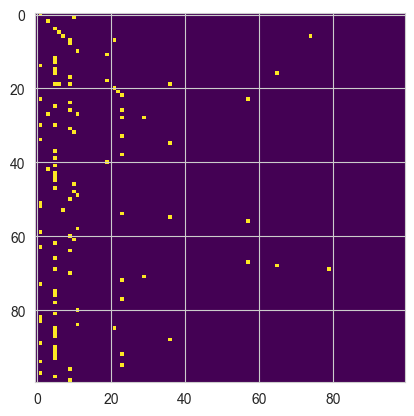

In [7]:
# Conver to adjacency matrix
A = nx.to_numpy_array(G)

plt.imshow(A, cmap='viridis')

## Scale Free Networks

In [39]:
from master_thesis.tools.data import scale_free_network
from master_thesis.tools.plots import plot_sample_networks

class_a = {
    "initial_network": "ring",
    "initial_network_size": 3,
    "n": 100,
    "alpha": 0.9,
    "beta": 0.05,
    "gamma": 0.05,
    "delta_in": 0.0,
    "delta_out": 0.0
}

class_b = {
    "initial_network": "ring",
    "initial_network_size": 3,
    "n": 100,
    "alpha": 0.05,
    "beta": 0.9,
    "gamma": 0.05,
    "delta_in": 50.0,
    "delta_out": 0.
}

In [40]:
X = \
    [scale_free_network(copy(class_a), 42 + seed).to_undirected() for seed in range(10)] +\
    [scale_free_network(copy(class_b), 420 + seed).to_undirected() for seed in range(10)]
y = [0]*10 + [1]*10

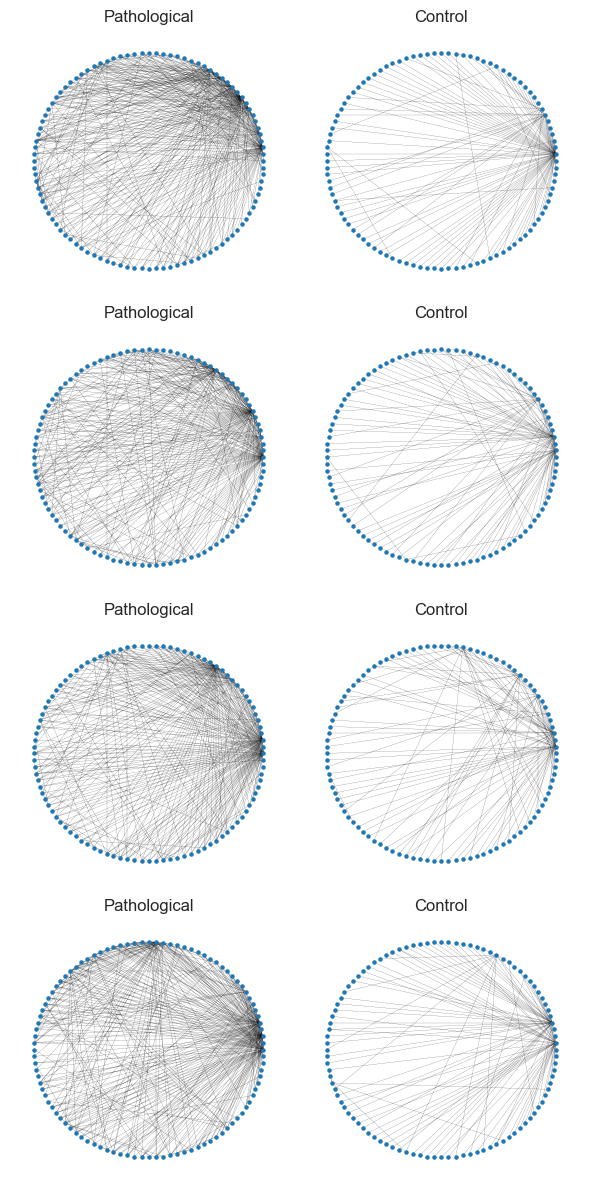

In [41]:
plot_sample_networks(X, y, rows=4)